### Visualização de Dados

### Importando bibliotecas e DataFrames

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%store -r df

## 1. Construa um histograma denotando a quantidade de casos nos 10 bairros em que houve mais casos registrados. Inclua todos os bairros remanescentes em uma categoria denominada “Ou-tros.” Denote as informações de maneira percentual

NameError: name 'rects' is not defined

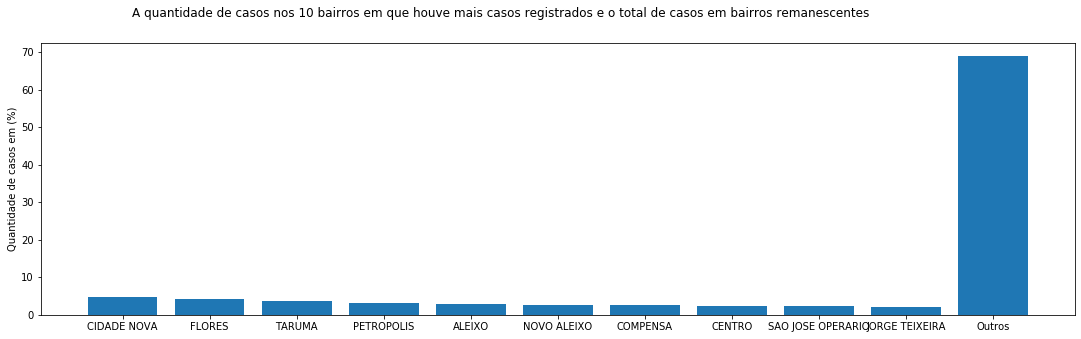

In [27]:
neighborhoods = df[df['_classificacao'].isin(['Confirmado'])].groupby(by='_bairro').size().sort_values(ascending=False).head(10)
others = df[df['_classificacao'].isin(['Confirmado'])].groupby(by='_bairro').size().sort_values(ascending=True).head(403).sum()

names = [neighborhood for neighborhood in neighborhoods.index]
names.append('Outros')
values = [(neighborhood/6145)*100 for neighborhood in neighborhoods]
values.append((others/6145)*100)

plt.figure(figsize=(63, 5))
plt.suptitle('A quantidade de casos nos 10 bairros em que houve mais casos registrados e o total de casos em bairros remanescentes')
plt.subplot(132)
plt.ylabel('Quantidade de casos em (%)')
plt.bar(names, values)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1.5),
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects)
plt.show()

In [13]:
#print(neighborhoods

others

4240

_bairro
CIDADE NOVA         -3944
FLORES              -3978
TARUMA              -4015
PETROPOLIS          -4047
ALEIXO              -4068
NOVO ALEIXO         -4073
COMPENSA            -4076
CENTRO              -4089
SAO JOSE OPERARIO   -4100
JORGE TEIXEIRA      -4105
dtype: int64


In [19]:


names = [neighborhood for neighborhood in neighborhoods.index]
names.append('Outros')
values = [(neighborhood/6145)*100 for neighborhood in neighborhoods]
values.append((others/6145)*100)
print(names)
print(values)

['CIDADE NOVA', 'FLORES', 'TARUMA', 'PETROPOLIS', 'ALEIXO', 'NOVO ALEIXO', 'COMPENSA', 'CENTRO', 'SAO JOSE OPERARIO', 'JORGE TEIXEIRA', 'Outros']
[4.816924328722539, 4.263628966639545, 3.6615134255492268, 3.140764849471115, 2.7990235964198535, 2.7176566314076487, 2.6688364524003254, 2.4572823433685924, 2.2782750203417415, 2.196908055329536, 68.99918633034989]


In [58]:
names = [neighborhood for neighborhood in neighborhoods.index]
print(names)
values = [(neighborhood/6145)*100 for neighborhood in neighborhoods]

'''

'''

['CIDADE NOVA', 'FLORES', 'TARUMA', 'PETROPOLIS', 'ALEIXO', 'NOVO ALEIXO', 'COMPENSA', 'CENTRO', 'SAO JOSE OPERARIO', 'JORGE TEIXEIRA']


'\nplt.figure(figsize=(63, 5))\nplt.suptitle(\'A quantidade de casos nos 10 bairros em que houve mais casos registrados\')\nplt.subplot(132)\nplt.ylabel(\'Quantidade de casos em (%)\')\nplt.bar(names, values)\n\ndef autolabel(rects):\n    for rect in rects:\n        height = rect.get_height()\n        ax.annotate(\'{}\'.format(height),\n                    xy=(rect.get_x() + rect.get_width() / 2, height),\n                    xytext=(0, 1.5),\n                    textcoords="offset points",\n                    ha=\'center\', va=\'bottom\')\n\n\nplt.show()\n'

## 2. Denote, por sexo, o boxplot da idade dos casos confirmados. Há outliers?

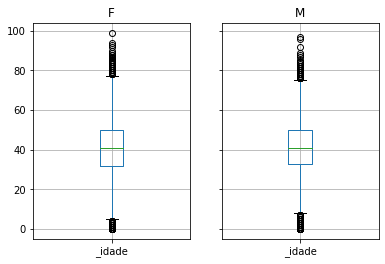

In [6]:
df.groupby('_sexo').boxplot(column=['_idade'])
plt.show()

## 3. Denote em um gráfico de barras o número de novos casos por dia, considerando os 10 últimos dias existentes na base de dados

In [6]:
df_cases = pd.to_datetime(df['_dt_notificacao'], format="%d/%m/%Y")
array_dates = np.sort(df_cases.dropna().dt.strftime("%m/%d/%Y"))
unique_elements, counts_elements = np.unique(array_dates, return_counts=True)
result = np.asarray((unique_elements[::-1], counts_elements[::-1]))
last_ten_days_dates = result[0][:10][::-1]
last_ten_days_values = result[1][:10][::-1]

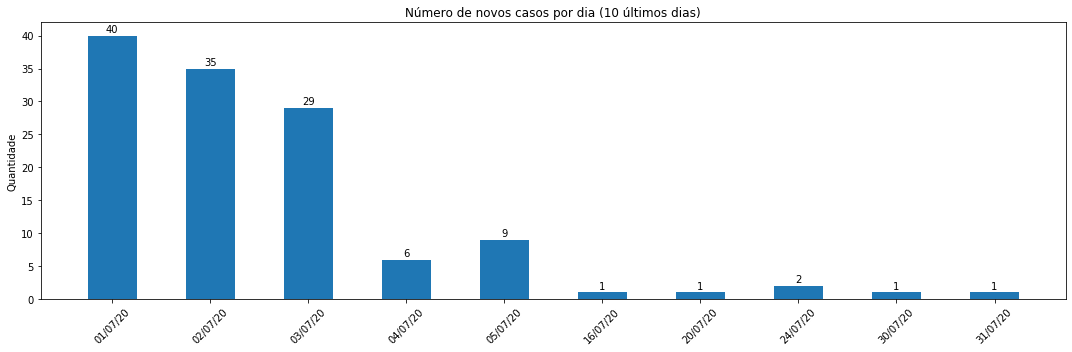

In [7]:
labels = pd.to_datetime(last_ten_days_dates).strftime("%d/%m/%y")
values = last_ten_days_values

x = np.arange(len(labels))
width = 0.5

fig, ax = plt.subplots(figsize=(15,5))
rects = ax.bar(x - width/2, values, width, align= 'edge')

ax.set_ylabel('Quantidade')
ax.set_title("Número de novos casos por dia (10 últimos dias)")
ax.set_xticks(x)
plt.xticks(rotation=45)
ax.set_xticklabels(labels)


autolabel(rects)
fig.tight_layout()

plt.show()

### 4. Repita o gráfico anterior considerando o número de casos recuperado

In [8]:
df['_dt_notificacao'] = pd.to_datetime(df['_dt_notificacao'], format="%d/%m/%Y")
df_cases_recovered = df[df['_conclusao'].isin(['Recuperado'])]
array_dates = np.sort(df_cases_recovered['_dt_notificacao'].dropna().dt.strftime("%m/%d/%Y"))
unique_elements, counts_elements = np.unique(array_dates, return_counts=True)
result = np.asarray((unique_elements[::-1], counts_elements[::-1]))
recovered_days_dates = result[0][:10][::-1]
recovered_days_values = result[1][:10][::-1]

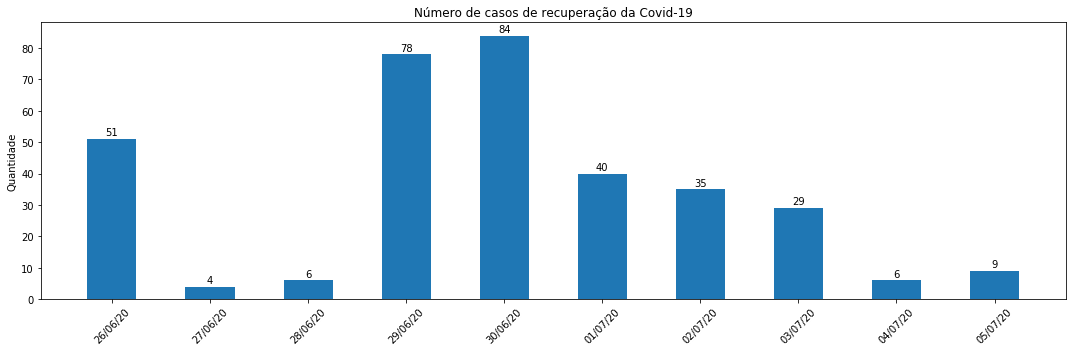

In [9]:
labels = pd.to_datetime(recovered_days_dates).strftime("%d/%m/%y")
values = recovered_days_values

x = np.arange(len(labels))
width = 0.5

fig, ax = plt.subplots(figsize=(15, 5))
rects = ax.bar(x - width/2, values, width, align='edge')

ax.set_ylabel('Quantidade')
ax.set_title("Número de casos de recuperação da Covid-19")
ax.set_xticks(x)
plt.xticks(rotation=45)
ax.set_xticklabels(labels)


autolabel(rects)
fig.tight_layout()

plt.show()
    